In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to generate a random boolean function
def generate_random_boolean_function(n_bits):
  shape = tuple([2]*n_bits)
  outputs = np.random.randint(2, size=shape)
  return (lambda bits: outputs[tuple(bits)])

# Function to pick random connections for a node
def pick_random_connections(N, k, i):
  others = list(range(N))
  others.remove(i)
  return sorted(random.sample(tuple(others), k))

# Class representing a random boolean network
class RandomBooleanNetwork:
  def __init__(self, N, k, initial_state):
    self.N = N
    self.k = k
    self.initial_state = initial_state
    self.state = initial_state
    self.connections = [pick_random_connections(self.N, self.k, i) for i in range(self.N)]
    self.functions = [generate_random_boolean_function(k) for _ in range(self.N)]

  # Evaluate the boolean function for a node
  def evaluate_function(self, i):
    inputs = [self.state[j] for j in self.connections[i]]
    return self.functions[i](inputs)

  # Update the state of the network
  def update_state(self):
    new_state = np.zeros(self.N, dtype=int)
    for i in range(self.N):
      new_state[i] = self.evaluate_function(i)
    self.state = new_state
  
  # Simulate the network for a given number of steps
  def simulate(self, steps):
    states = [self.state]
    for _ in range(steps):
      self.update_state()
      states.append(self.state)
    return states

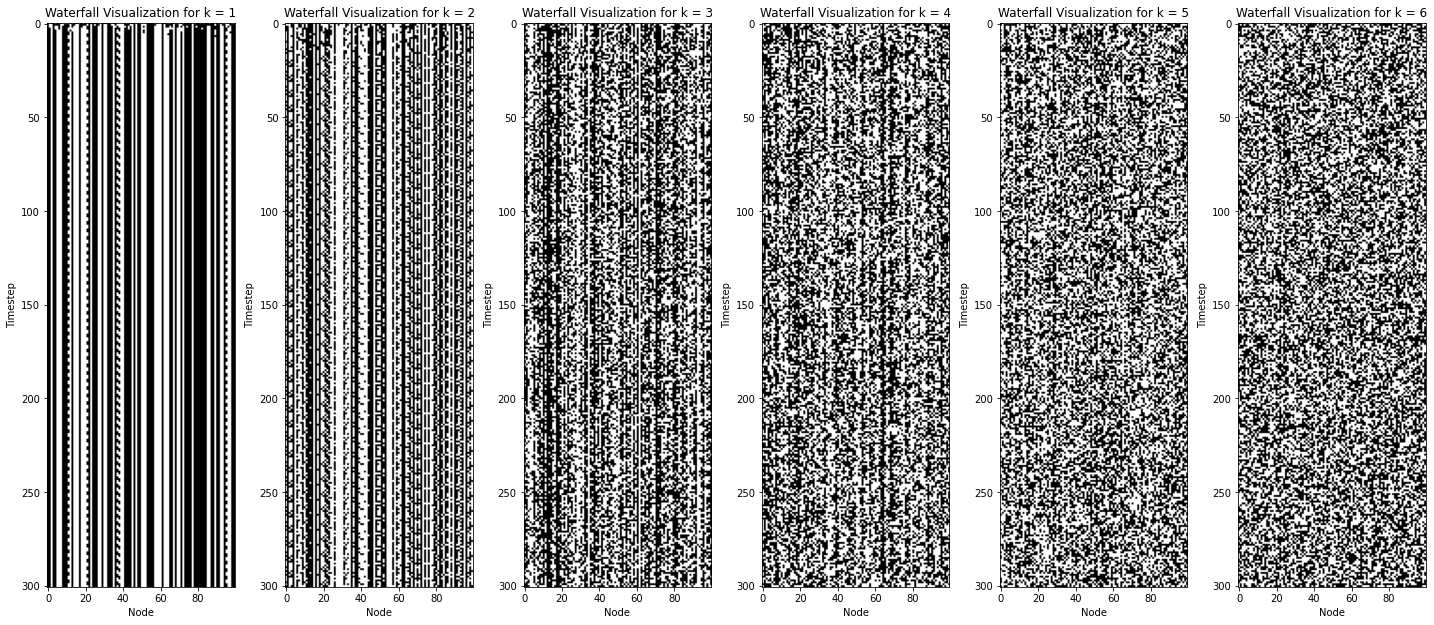

In [33]:
nk = 6

def create_waterfall_subplot(ax, k):
    num_nodes = 100  # Number of nodes in the network
    steps = 300     # Number of timesteps

    initial = np.random.randint(2, size=(num_nodes))
    rbn = RandomBooleanNetwork(num_nodes, k, initial)
    evolution = np.array(rbn.simulate(steps))

    aspect_ratio = 1
    im = ax.imshow(evolution, aspect=aspect_ratio, cmap='binary')  # Transpose the array before plotting
    ax.set_xlabel('Node')  # Swap x-axis label
    ax.set_ylabel('Timestep')  # Swap y-axis label
    ax.set_title(f'Waterfall Visualization for k = {k}')
    #plt.colorbar(im, ax=ax, label='State') 

# Create subplots for each value of k
fig, axs = plt.subplots(1, nk, figsize=(20,30))

# Generate waterfall plots for k = 1, 2, 3
for i, k in enumerate(range(1, nk + 1)):
    create_waterfall_subplot(axs[i], k)

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [34]:
import random
n_nodes = 200
n_connections = 5
threshold = 1
timesteps = 500

random_list = random.choices([-1, 0, 1], k=n_nodes)

indices = [random.sample(range(n_nodes), n_connections) for _ in random_list]
result = [[random.choices([-1,1]) if i in idx else 0 for i in range(n_nodes)] for idx in indices]

sums = [sum(random_list[i] for i in idx) for idx in indices]

new_list = [1 if s >= threshold else 0 for s in sums]

data = []

for i in range(timesteps):
    random_list = new_list
    sums = [sum(random_list[i] for i in idx) for idx in indices]

    new_list = [random.choice([-1,1]) if s >= threshold else 0 for s in sums]
    data.append(new_list)


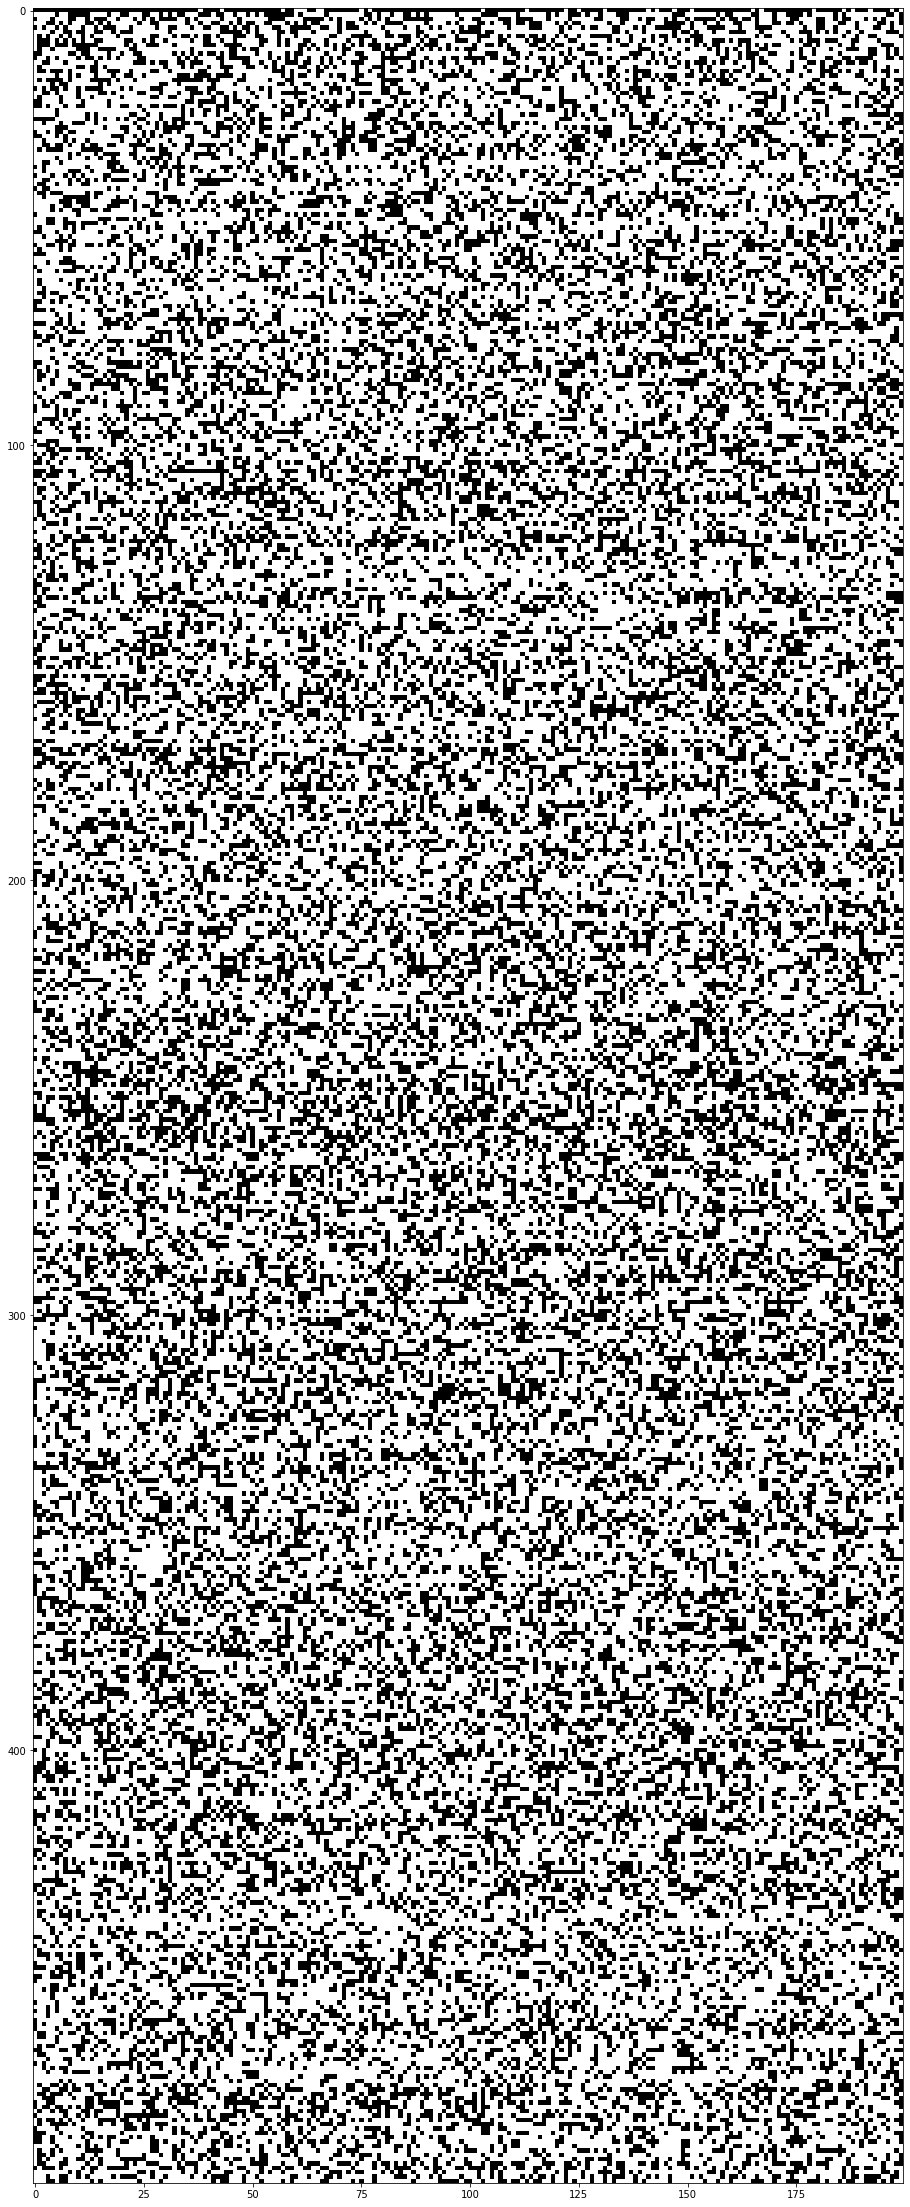

In [35]:
fig, axs = plt.subplots(1, figsize=(40,40))
modified_data = [[0 if val == 0 else 1 for val in vector] for vector in data]
im = axs.imshow(modified_data, cmap='binary')

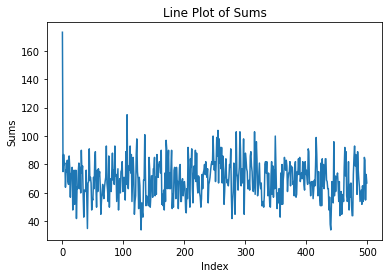

In [36]:
sums = [sum(i) for i in modified_data]

# Plot the line graph
plt.plot(range(len(sums)), sums)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Sums')
plt.title('Line Plot of Sums')

# Display the plot
plt.show()


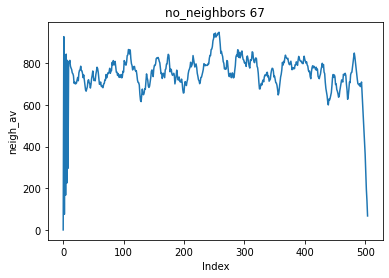

In [38]:
no_neighbors = 10 # needs to be even

for i in range(no_neighbors):

    neigh_av = []

    for ndx, i in enumerate(sums):

        if ndx < no_neighbors / 2: 
            diff = no_neighbors - ndx
            prec = [0] * diff
        
            neighbor_average = sum(prec + sums[ndx:ndx + no_neighbors - len(prec)])
            neigh_av.append(neighbor_average)

        elif ndx > (len(sums)):
            print('ok')

        neighbor_average = sum(sums[ndx:ndx + no_neighbors + 1])
        neigh_av.append(neighbor_average)


plt.plot(range(len(neigh_av)), neigh_av)
plt.xlabel('Index')
plt.ylabel('neigh_av')
plt.title(f'no_neighbors {i}')
plt.show()


In [42]:
import plotly.graph_objects as go

# FILEPATH: /c:/coding-projects/rec_nn/random_networks.ipynb
j = 7  # Interval for binning

fig = go.Figure(data=[go.Histogram(x=sums, xbins=dict(start=min(sums), end=max(sums) + j, size=j))])
fig.update_layout(
    title='Histogram of Sums with Evenly Dispersed Bins',
    xaxis_title='Sums',
    yaxis_title='Frequency'
)

fig.update_layout(
    title='Histogram of Sums with Evenly Dispersed Bins',
    xaxis_title='Sums',
    yaxis_title='Frequency',
    width=800,  
    height=600  
)

fig.show()
